<a href="https://colab.research.google.com/github/RedBatProject/Works/blob/main/work80economy_sentiment_DONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [ ]:
# k.to_csv(f'{rs}results.csv')


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from itertools import chain
import tensorflow as tf
# from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
# from transformers import XLNetTokenizer, TFXLNetModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
%matplotlib inline

In [ ]:
# import plotly.express as px
# import plotly.graph_objs as go
# import plotly.offline as pyo
# from plotly.subplots import make_subplots

# Load Data

In [ ]:
# !pip install -q kaggle
# from google.colab import files
# files.upload()


In [ ]:
# import json

In [ ]:
# import json
# u = {"username":"willyvonka","key":"5126a29ceedbfdc4a11419e257598dd4"}
# h = open('./kaggle.json','w')
# json.dump(u,h)
# h.close()

In [ ]:
# h = open('./kaggle.json','w')
# json.dump(u,h)
# h.close()

In [ ]:
!mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# https://www.kaggle.com/datasets/falgunipatel19/biomedical-text-publication-classification

In [ ]:
# https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

In [ ]:
# !kaggle datasets download -d gpreda/pfizer-vaccine-tweets
# !kaggle datasets download -d mayurdalvi/twitter-sentiments-analysis-nlp
!kaggle datasets download -d sbhatti/financial-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis
License(s): CC0-1.0
100% 276k/276k [00:00<00:00, 442kB/s]
100% 276k/276k [00:00<00:00, 442kB/s]


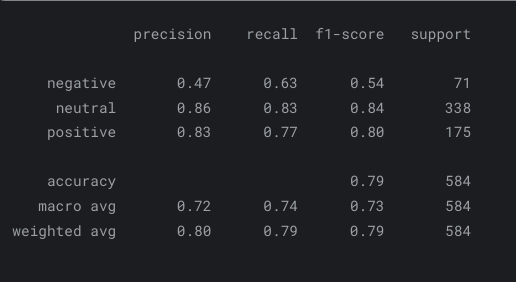

In [ ]:
!unzip /content/financial-sentiment-analysis.zip

Archive:  /content/financial-sentiment-analysis.zip
  inflating: data.csv                


# Read Data

In [16]:
import os
path0 = '/content/drive/MyDrive/work-80-financial-sentiment-analysis/'
path = path0+'results/'
#
os.makedirs(path0,exist_ok=True)
os.makedirs(path,exist_ok=True)


In [13]:
# !rm -fr /content/drive/

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# !mv /content/vaccination_tweets.csv 'data.csv'

In [17]:
df=pd.read_csv("/content/drive/MyDrive/work-80-financial-sentiment-analysis/data.csv")
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20
...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13


In [ ]:
# !pip install vaderSentiment
# !pip install twython

In [18]:
import re

In [19]:
df.columns

Index(['Unnamed: 0', 'Sentence', 'sentiment', 'text', 'label', 'word_count'], dtype='object')

In [ ]:
def clean(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[^A-Za-z0-9 ]','', text)
    return text



df['text'] = df['Sentence'].apply(lambda x:clean(x))


In [ ]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# analyser = SentimentIntensityAnalyzer()
# scores=[]
# for i in range(len(df['text'])):

#     score = analyser.polarity_scores(df['text'][i])
#     score=score['compound']
#     scores.append(score)
# sentiment=[]
# for i in scores:
#     if i>=0.05:
#         sentiment.append('Positive')
#     elif i<=(-0.05):
#         sentiment.append('Negative')
#     else:
#         sentiment.append('Neutral')
# df['sentiment']=pd.Series(np.array(sentiment))

In [ ]:
# re.sub('[^A-Za-z0-9 ]','','#$hello 9')

In [ ]:
# df.to_csv(f'{path}data.csv',index=False)

In [ ]:
df = df[['text','label']]

In [ ]:
df.columns = ['text','sentiment']

In [ ]:
df.dropna(inplace=True)

<ipython-input-26-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df.shape

(31962, 2)

In [ ]:
df.isnull().sum()

Sentence     0
Sentiment    0
text         0
dtype: int64

In [ ]:
# 1 acist
# 0 no

In [ ]:
df

,Sentence,Sentiment,text
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...
5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...


In [ ]:
clc = df.columns

In [ ]:
# sns.relplot(data=df,x=clc[-4],y=clc[-3],hue=clc[-1])
# plt.xlim(0,0.4*1000000)
# plt.ylim(0,25000)
# plt.xticks(rotation=90)

### You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

In [ ]:
df.columns = ['Sentence', 'sentiment', 'text']

In [20]:
df.sentiment.value_counts()

sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [ ]:
# df['label'],l1 = df['sentiment'].factorize()

In [21]:
df['sentiment']

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: sentiment, Length: 5842, dtype: object

In [ ]:
df['label'] = df['sentiment'].replace({'positive':0,'negative':1,'neutral':2})

# df['label'] = df['sentiment'].replace({1:'Racist',0:'Normal'})

In [ ]:
# df.to_csv('/content/drive/MyDrive/data/work 49 phyzer/df3.csv',index=False)
# df

In [ ]:
df['label']

0       0
1       1
2       0
3       2
4       2
       ..
5837    1
5838    2
5839    2
5840    2
5841    0
Name: label, Length: 5842, dtype: int64

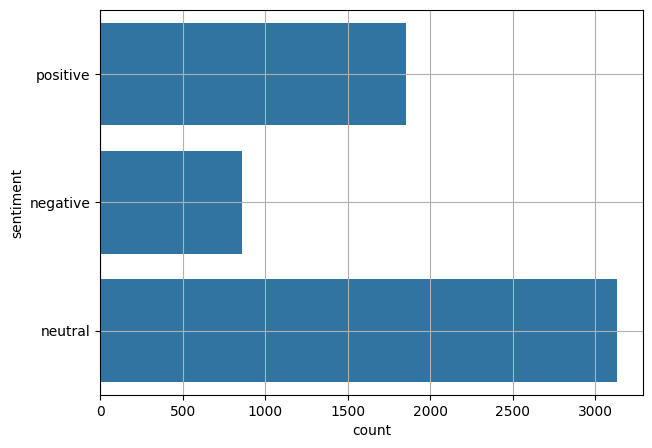

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, y="sentiment")
# plt.title("Compare Target")
df[['sentiment','label']].to_csv(f'{path}labels.csv',index=False)
plt.grid()
plt.savefig(f'{path}labels.png',bbox_inches='tight')
plt.show()

In [ ]:
df.columns

Index(['text', 'sentiment', 'label'], dtype='object')

# Count Character

In [ ]:
# df.columns = ['text','emotion','label']

In [ ]:
df["character_count"]=df["text"].str.len()

# Count Word

In [24]:
df = df.copy()

In [25]:
df['word_count'] = df['text'].str.split().str.len()
df["character_count"]=df["text"].str.len()

In [27]:
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count,character_count
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29,214
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9,43
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32,165
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18,125
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20,129
...,...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15,104
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13,81
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14,97
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13,76


In [26]:
df['word_count'].max()

50

# Count Sentence

In [ ]:
# cor=df[["target","character_count","word_count"]].corr()
# plt.figure(figsize=(7,5))
# sns.heatmap(cor,annot=True,cmap="jet",linewidths=7, linecolor='darkorange')
# cor.to_csv(f'{path}_cor.csv')
# plt.savefig(f'{path}_cor.png',bbox_inches='tight')
# plt.show()

# Data Length

In [ ]:
df['len'] = df['text'].str.split().apply(len)

In [28]:
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count,character_count
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29,214
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9,43
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32,165
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18,125
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20,129
...,...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15,104
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13,81
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14,97
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13,76


In [ ]:
df = df.copy()

In [31]:
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count,character_count
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29,214
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9,43
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32,165
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18,125
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20,129
...,...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15,104
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13,81
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14,97
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13,76


In [189]:
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count,character_count,text2,len1,len2,Original,preprocessed
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29,214,geosolutions technology leverage benefon gps s...,32,21,32,21
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9,43,esi lows bk real possibility,11,5,11,5
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32,165,last quarter componenta net sales doubled peri...,39,15,39,15
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18,125,according finnishrussian chamber commerce majo...,20,10,20,10
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20,129,swedish buyout firm sold remaining percent sta...,23,14,23,14
...,...,...,...,...,...,...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15,104,rising costs forced packaging producer huhtama...,17,11,17,11
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13,81,nordic walking first used summer training meth...,14,9,14,9
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14,97,according shipping company viking line eu deci...,16,10,16,10
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13,76,building home improvement trade sales decrease...,18,8,18,8


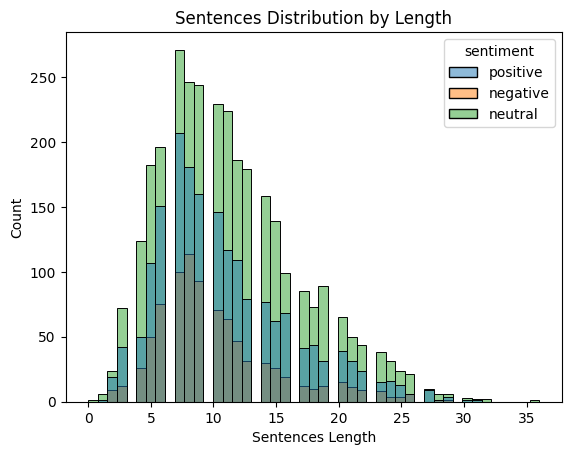

In [193]:
# df.len.plot(kind='hist')
sns.histplot(data=df,x='len2',hue='sentiment')
plt.title('Sentences Distribution by Length')
plt.xlabel('Sentences Length')
# sns.set_palette('tab10')
# plt.xlim(0,200)
df[['len2','sentiment']].to_csv(f"{path}Sentence_word_count_Distribution.csv",index=False)
plt.savefig(f"{path}Sentence_word_count_Distribution.png",bbox_inches='tight')


In [ ]:
# df = df[df['word_count']>=5]

In [ ]:
# notdisaster_len=df[df["target"]==0]["text"].str.split().apply(len)
# disaster_len=df[df["target"]==1]["text"].str.split().apply(len)
# plt.figure(figsize=(7,5))
# plt.hist(notdisaster_len, bins=40,label='Fake',color="red")
# plt.hist(disaster_len , bins=40, label='Real',color="green")
# plt.xlim(0,2000)
# plt.title("Real Vs Fake tweet")
# plt.legend()
# notdisaster_len.to_csv(f'{path}_Fake_len.csv',index=False)
# disaster_len.to_csv(f'{path}_Real_len.csv',index=False)

# plt.savefig(f'{path}_Real-Fake_len.png',bbox_inches='tight')
# plt.show()

In [ ]:
df.columns = ['Sentence', 'sentiment', 'text', 'label', 'word_count']

In [ ]:
# df['word_count'].mean()
df['word_count'].mean(),df['word_count'].median(),df['word_count'].mode()

(17.447107155083874,
 16.0,
 0    10
 Name: word_count, dtype: int64)

In [36]:
df['word_count'].min()

1

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/data/work 49 phyzer/df3.csv')
# df

# ALL Data Wordcloud

In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# all_text=" ".join(df['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(all_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_all_data.png',bbox_inches='tight')
# plt.show()

# Disaster Data Wordcloud

In [ ]:
df

,text,sentiment,label,len,text2,len1,len2
0,Same folks said daikon paste could treat a cyt...,Positive,0,11,folks said daikon paste could treat cytokine s...,11,9
1,While the world has been on the wrong side of ...,Negative,1,20,world wrong side history year hopefully bigges...,20,11
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,Positive,0,12,coronavirus sputnikv astrazeneca pfizerbiontec...,12,10
3,Facts are immutable Senator even when youre no...,Neutral,2,18,facts immutable senator even youre ethically s...,18,10
4,Explain to me again why we need a vaccine Bori...,Neutral,2,13,explain need vaccine borisjohnson matthancock ...,13,7
...,...,...,...,...,...,...,...
10694,ruvanw GMalavige I already had my for Pfizer...,Neutral,2,14,ruvanw gmalavige already pfizerbiontech last m...,14,8
10695,The number of Covid cases today November Rem...,Positive,0,16,number covid cases today november remember obs...,16,10
10696,The number of Covid cases today November Rem...,Positive,0,16,number covid cases today november remember obs...,16,10
10697,PfizerBioNTech has developed new pill Paxlovid...,Positive,0,16,pfizerbiontech developed new pill paxlovid inc...,16,9


In [ ]:
j = 'Positive'

In [ ]:
plt.figure(figsize=(16,8),dpi=600)
disaster_wordcloud=df[df["sentiment"]==j]
disaster_text=" ".join(disaster_wordcloud['text2'].values.tolist())
wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(disaster_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title(f'{j} Tweets')
plt.savefig(f'{rs}WordCloud_{j}.png',bbox_inches='tight')
plt.show()

# Non Disaster Wordcloud

In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# nondisaster_wordcloud=df[df["target"]==0]
# nondisaster_text=" ".join(nondisaster_wordcloud['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(nondisaster_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_non_disaster_data.png',bbox_inches='tight')
# plt.show()

# 30 Most common Words From All Text

In [64]:
df.columns

Index(['Unnamed: 0', 'Sentence', 'sentiment', 'text', 'label', 'word_count',
       'character_count', 'text2', 'len1', 'len2', 'Original', 'preprocessed'],
      dtype='object')

<ipython-input-66-71ec334bddce>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)


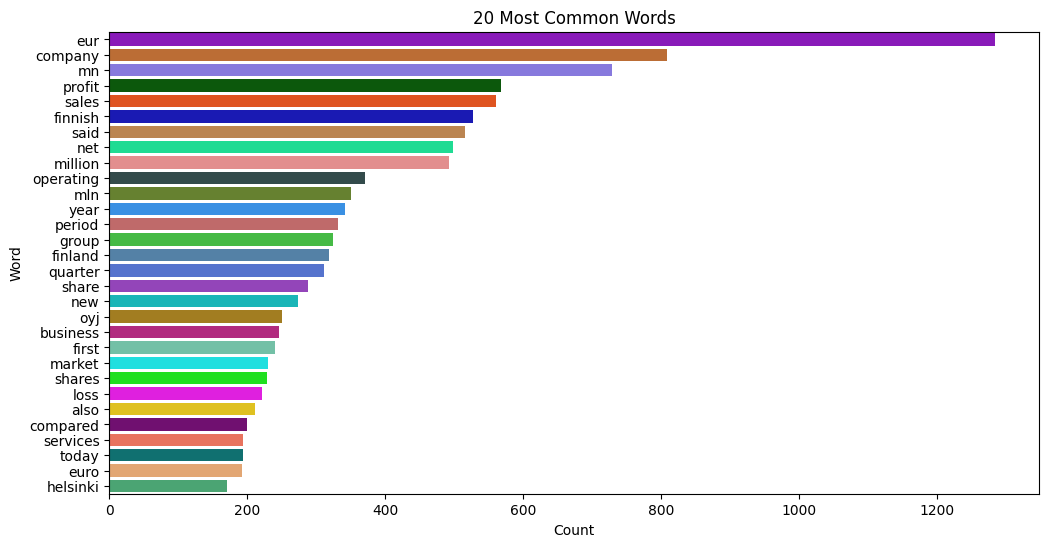

In [66]:
data_set =df["text2"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen",
    "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",

          "cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('20 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
df_common_words.to_csv(f'{path}_df_common_words.csv')
plt.savefig(f'{path}_df_common_words.png',bbox_inches='tight')
plt.show()


# Most Common Words From Non Disaster Text

In [ ]:
df

,text,emotion,label,character_count,word_count,len
0,Same folks said daikon paste could treat a cyt...,Positive,0,74,11,11
1,While the world has been on the wrong side of ...,Negative,1,117,20,20
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Positive,0,107,14,14
3,"Facts are immutable, Senator, even when you're...",Neutral,2,116,19,19
4,Explain to me again why we need a vaccine @Bor...,Neutral,2,112,13,13
...,...,...,...,...,...,...
11014,@ruvanw @GMalavige @ I already had my for #Pf...,Neutral,2,89,15,15
11015,"The number of Covid- cases today, November . ...",Positive,0,109,17,17
11017,"The number of Covid- cases today, November . ...",Positive,0,109,17,17
11018,#PfizerBioNTech has developed new pill #Paxlov...,Positive,0,110,17,17


In [ ]:
import re

In [37]:
def removepunc(x):
    x = x.lower()
    x = re.sub(r" ' ","",x)
    x = re.sub(r"'","",x)
    x = re.sub(r"\r"," ",x)
    x = re.sub(r"\n"," ",x)
    # x = re.sub(r" / ","",x)

    # x = re.sub(r" . ","",x)

    x = re.sub(r"(@[A-Za-z]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x)
    # x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    return x

In [38]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
stop_words = set(stopwords.words('english'))

In [40]:
def lenword(x):
  # l = x.spllit()
  x = ' '.join([word for word in x.split() if (len(word) > 1 or word in (['i','a']))])
  x = ' '.join([word for word in x.split() if word not in stop_words])

  return x

In [41]:
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count,character_count
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29,214
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9,43
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32,165
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18,125
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20,129
...,...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15,104
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13,81
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14,97
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13,76


In [46]:
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count,character_count,text2,len1,len2
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29,214,geosolutions technology leverage benefon gps s...,29,21
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9,43,esi lows bk real possibility,9,5
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32,165,last quarter componenta net sales doubled peri...,32,15
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18,125,according finnishrussian chamber commerce majo...,18,10
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20,129,swedish buyout firm sold remaining percent sta...,20,14
...,...,...,...,...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15,104,rising costs forced packaging producer huhtama...,15,11
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13,81,nordic walking first used summer training meth...,13,9
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14,97,according shipping company viking line eu deci...,14,10
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13,76,building home improvement trade sales decrease...,13,8


In [42]:
df['text2'] = df['text'].apply(lambda x:removepunc(x))

In [43]:
df['text2'] = df['text2'].apply(lambda x:lenword(x))

In [52]:
df['Original'] = df['Sentence'].str.split().apply(len)
df['preprocessed'] = df['text2'].str.split().apply(len)


In [58]:
path

'/content/drive/MyDrive/work-80-financial-sentiment-analysis/results/'

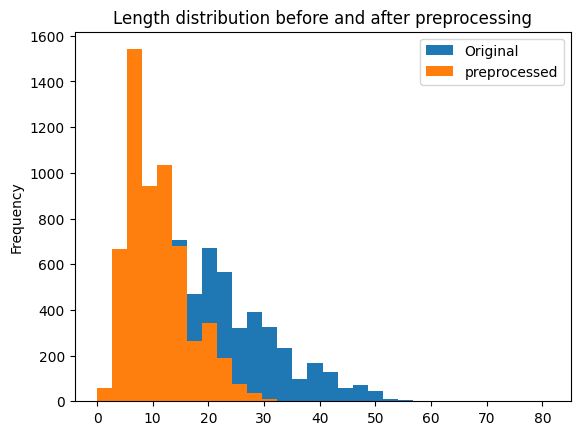

In [61]:
df[['Original','preprocessed']].plot(kind='hist',bins=30)
plt.title('Length distribution before and after preprocessing')
df[['Original','preprocessed']].to_csv(f'{path}Length distribution before and after preprocessing.cdv',index=False)
plt.savefig(f'{path}Length distribution before and after preprocessing.png',bbox_inches='tight')


# Length distribution before and after preprocessing

In [50]:
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count,character_count,text2,len1,len2
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29,214,geosolutions technology leverage benefon gps s...,32,21
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9,43,esi lows bk real possibility,11,5
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32,165,last quarter componenta net sales doubled peri...,39,15
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18,125,according finnishrussian chamber commerce majo...,20,10
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20,129,swedish buyout firm sold remaining percent sta...,23,14
...,...,...,...,...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15,104,rising costs forced packaging producer huhtama...,17,11
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13,81,nordic walking first used summer training meth...,14,9
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14,97,according shipping company viking line eu deci...,16,10
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13,76,building home improvement trade sales decrease...,18,8


<Axes: ylabel='Frequency'>

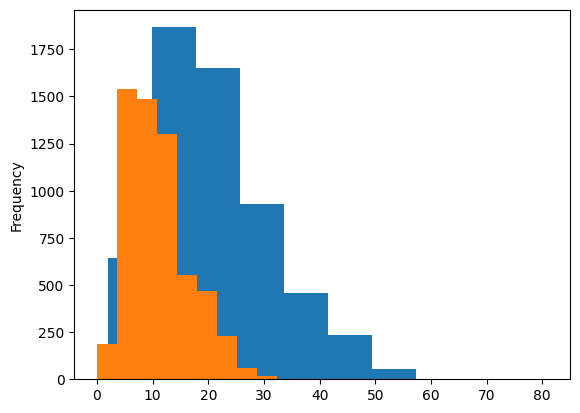

In [49]:
df.len1.plot(kind='hist')
df.len2.plot(kind='hist')
plt.title('Length distribution before and after preprocessing.')

In [ ]:
dff = df[['len1','len2']]
dff.columns = ['Length whit StopWords','Length when StopWords are removed (aboud 40% less)']

In [ ]:
df

,text,sentiment,label,len,text2,len1,len2
0,Same folks said daikon paste could treat a cyt...,Positive,0,11,folks said daikon paste could treat cytokine s...,11,9
1,While the world has been on the wrong side of ...,Negative,1,20,world wrong side history year hopefully bigges...,20,11
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,Positive,0,12,coronavirus sputnikv astrazeneca pfizerbiontec...,12,10
3,Facts are immutable Senator even when youre no...,Neutral,2,18,facts immutable senator even youre ethically s...,18,10
4,Explain to me again why we need a vaccine Bori...,Neutral,2,13,explain need vaccine borisjohnson matthancock ...,13,7
...,...,...,...,...,...,...,...
10694,ruvanw GMalavige I already had my for Pfizer...,Neutral,2,14,ruvanw gmalavige already pfizerbiontech last m...,14,8
10695,The number of Covid cases today November Rem...,Positive,0,16,number covid cases today november remember obs...,16,10
10696,The number of Covid cases today November Rem...,Positive,0,16,number covid cases today november remember obs...,16,10
10697,PfizerBioNTech has developed new pill Paxlovid...,Positive,0,16,pfizerbiontech developed new pill paxlovid inc...,16,9


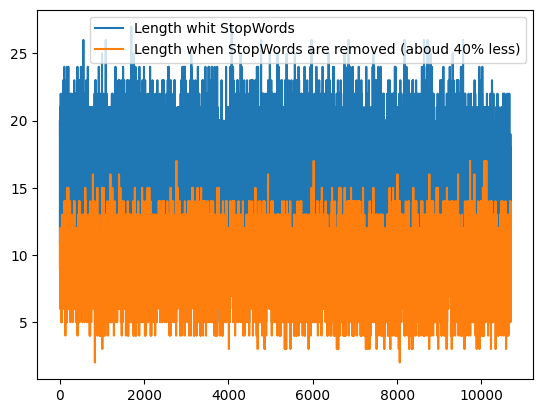

In [ ]:
plt.plot(range(df.shape[0]),dff['Length whit StopWords'],label='Length whit StopWords')
plt.plot(range(df.shape[0]),dff['Length when StopWords are removed (aboud 40% less)'],label='Length when StopWords are removed (aboud 40% less)')
plt.legend()
plt.savefig(f'{rs}sentences.png',bbox_inches='tight')
dff[['Length whit StopWords','Length when StopWords are removed (aboud 40% less)']].to_csv(f'{rs}sentences.csv')


In [ ]:
1 - (df['len2'].sum() / df['len1'].sum())

0.368567454798331

In [ ]:
# df.to_csv(f'{path}data.csv',index=False)
# df = pd.read_csv(f'{path}data.csv')

In [ ]:
from collections import Counter

In [ ]:
df

,text,sentiment,label,len,text2,len1,len2
0,Same folks said daikon paste could treat a cyt...,Positive,0,11,folks said daikon paste could treat cytokine s...,11,9
1,While the world has been on the wrong side of ...,Negative,1,20,world wrong side history year hopefully bigges...,20,11
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,Positive,0,12,coronavirus sputnikv astrazeneca pfizerbiontec...,12,10
3,Facts are immutable Senator even when youre no...,Neutral,2,18,facts immutable senator even youre ethically s...,18,10
4,Explain to me again why we need a vaccine Bori...,Neutral,2,13,explain need vaccine borisjohnson matthancock ...,13,7
...,...,...,...,...,...,...,...
10694,ruvanw GMalavige I already had my for Pfizer...,Neutral,2,14,ruvanw gmalavige already pfizerbiontech last m...,14,8
10695,The number of Covid cases today November Rem...,Positive,0,16,number covid cases today november remember obs...,16,10
10696,The number of Covid cases today November Rem...,Positive,0,16,number covid cases today november remember obs...,16,10
10697,PfizerBioNTech has developed new pill Paxlovid...,Positive,0,16,pfizerbiontech developed new pill paxlovid inc...,16,9


<ipython-input-62-3b66102b2b53>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




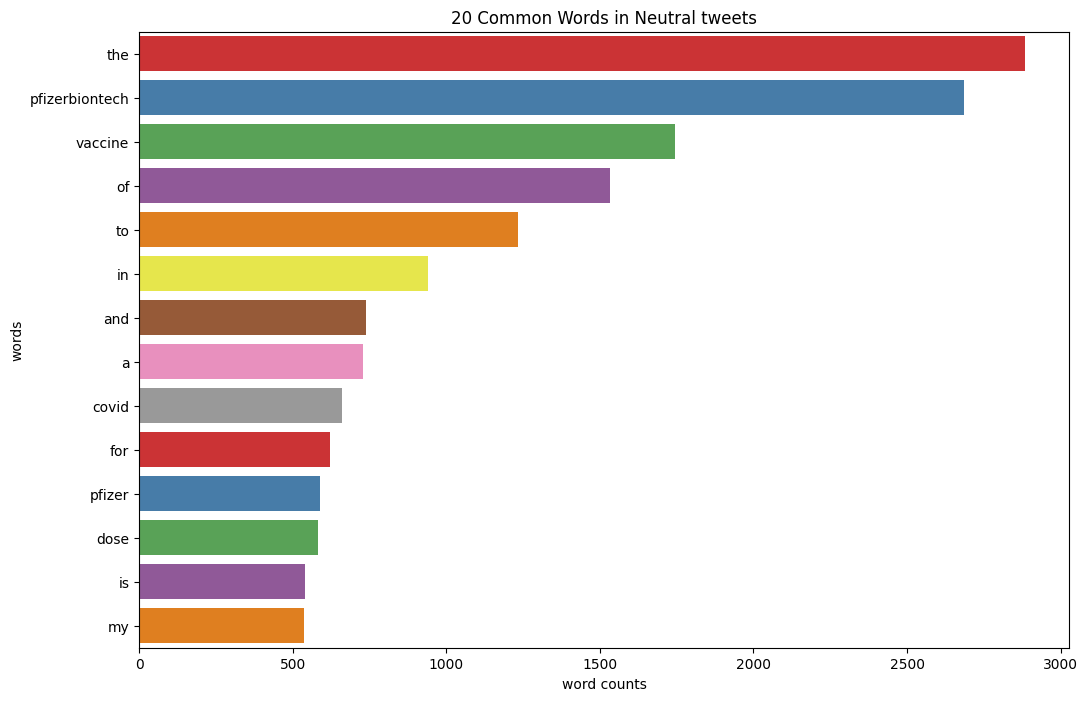

In [ ]:
no_disaster_text = df[df["label"] == 2]
data_set = no_disaster_text["text2"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(14)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('20 Common Words in Neutral tweets')
plt.xlabel('word counts')
plt.ylabel('words')
# plt.ylabel('Word')
df_common_words.to_csv(f'{path}_df_common_words_neutral.csv')
plt.savefig(f'{path}_df_common_words_neutral.png',bbox_inches='tight')
plt.show()



# 30 Most Common Words From Disaster Text

In [ ]:
# disaster_text = df[df["target"] == 1]
# data_set = disaster_text["text"].str.split()
# all_words = [word for sublist in data_set for word in sublist]
# counter = Counter(all_words)
# common_words = counter.most_common(30)
# df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
# plt.figure(figsize=(12, 8))
# colors = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "brown", "gray",
#           "cyan", "magenta", "teal", "olive", "lime", "navy", "maroon", "aquamarine",
#           "coral", "gold", "indigo", "lavender", "salmon", "silver", "tan", "violet",
#           "crimson", "darkgreen", "darkblue", "darkorange", "deeppink"]
# sns.barplot(x='Count', y='Word', data=df_common_words,palette=colors)
# plt.title('30 Most Common Words Real')
# plt.xlabel('Count  Real')
# plt.ylabel('Real Word')
# df_common_words.to_csv(f'{path}_df_common_words_Real.csv')
# plt.savefig(f'{path}_df_common_words_Real.png',bbox_inches='tight')
# plt.show()


# Character Count

In [ ]:
# color=["red","green"]
# plt.figure(figsize=(7,5))

# sns.histplot(data=df,x="character_count",palette=color,kde=True,hue="label",element="step",stat="density")
# plt.title("Character Count",fontsize=15,color="darkblue")
# df['character_count'].to_csv(f'{path}_character_count.csv')
# plt.savefig(f'{path}_character_count.png',bbox_inches='tight')
# plt.show()

# Word Count

In [ ]:
df

,text,sentiment,label,len,text2,len1,len2
0,Same folks said daikon paste could treat a cyt...,Positive,0,11,folks said daikon paste could treat cytokine s...,11,9
1,While the world has been on the wrong side of ...,Negative,1,20,world wrong side history year hopefully bigges...,20,11
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,Positive,0,12,coronavirus sputnikv astrazeneca pfizerbiontec...,12,10
3,Facts are immutable Senator even when youre no...,Neutral,2,18,facts immutable senator even youre ethically s...,18,10
4,Explain to me again why we need a vaccine Bori...,Neutral,2,13,explain need vaccine borisjohnson matthancock ...,13,7
...,...,...,...,...,...,...,...
10694,ruvanw GMalavige I already had my for Pfizer...,Neutral,2,14,ruvanw gmalavige already pfizerbiontech last m...,14,8
10695,The number of Covid cases today November Rem...,Positive,0,16,number covid cases today november remember obs...,16,10
10696,The number of Covid cases today November Rem...,Positive,0,16,number covid cases today november remember obs...,16,10
10697,PfizerBioNTech has developed new pill Paxlovid...,Positive,0,16,pfizerbiontech developed new pill paxlovid inc...,16,9


In [ ]:
color=["navy","darkorange"]
plt.figure(figsize=(7,5))

sns.histplot(data=df,x="word_count",palette=color,kde=True,hue="label")
plt.title("Word Count",fontsize=15,color="darkblue")
plt.xlim(0,2000)
df[['word_count','label']].to_csv(f'{path}_word_count.csv')
plt.savefig(f'{path}_word_count.png',bbox_inches='tight')
plt.show()

# Sentence Count

In [10]:
df.columns

Index(['Unnamed: 0', 'Sentence', 'sentiment', 'text', 'label', 'word_count'], dtype='object')

In [ ]:
df.drop(['character_count', 'word_count','text2'],axis=1,inplace=True)

# Average Sentence Length

In [ ]:
df['len'].mean(),df['len'].max()

(15.484792456318758, 31)

In [ ]:
df.columns

Index(['text', 'emotion', 'label', 'len'], dtype='object')

In [11]:
avg_len=df["text"].str.split().apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 17.45


# Maximum Length

In [12]:
path0

'/content/drive/MyDrive/work-80-financial-sentiment-analysis/'

In [ ]:
df.to_csv(f'{path0}data.csv')

In [13]:
df = pd.read_csv(f'{path0}data.csv')


In [14]:
SEQ_LEN=30

In [15]:
text_data=df["text"]
label_data=df["sentiment"]
label_data=np.array(label_data)

# Teransformer 2

In [16]:
# SEQ_LEN = 1250

In [17]:
tf.keras.backend.clear_session()

In [18]:
# pip install transformers

In [19]:
from transformers import AutoTokenizer
from transformers import TFAutoModel

In [20]:

# 10. GPT-Neo (Generative Pre-trained Transformer Neo):
#     - Full Name: `EleutherAI/gpt-neo-1.3B,gpt2` (or other versions with varying model sizes)

# 19. MarianMT (Multilingual Transformer-based Machine Translation):
#     - Full Name: `Helsinki-NLP/opus-mt-{src}-{tgt}` (Replace `{src}` and `{tgt}` with language codes)

In [21]:
kk = 't5-small,google/electra-base-discriminator,albert-base-v2,xlnet-base-cased,distilbert-base-uncased,roberta-base,bert-base-uncased,google/mt5-small,allenai/longformer-base-4096,facebook/bart-large,microsoft/mpnet-base,funnel-transformer/small-base,microsoft/deberta-base,google/mobilebert-uncased,xlm-roberta-base,ctrl,EleutherAI/gpt-neo-1.3B,gpt2,GPT-4/GPT-3/main,asi/albert-act-base,asi/albert-act-small,prajjwal1/bert-tiny,TheBloke/llama-2-70b-Guanaco-QLoRA-fp16,vinai/bertweet-base,nlpproject2023/small-bert,readerbench/RoBERT-small,SamLowe/roberta-base-go_emotions,roberta-base'.split(',')
len(kk)

28

In [22]:
# m = "stevhliu/my_awesome_model"
# m = 'TheBloke/llama-2-70b-Guanaco-QLoRA-fp16'
# m = 'GPT2'
# m = 'vinai/bertweet-base'
# m = 'GPT-4/GPT-3'
# m = 'tum-nlp/IDMGSP-Galactica-TRAIN_GPT3'
# m = 'asi/albert-act-small'
# m ='prajjwal1/bert-tiny'
# m = 'asi/albert-act-base'
# m = 'albert-base-v2'

In [23]:
# 0,
# 7
# 18
# 19
# 20


In [24]:
kk

['t5-small',
 'google/electra-base-discriminator',
 'albert-base-v2',
 'xlnet-base-cased',
 'distilbert-base-uncased',
 'roberta-base',
 'bert-base-uncased',
 'google/mt5-small',
 'allenai/longformer-base-4096',
 'facebook/bart-large',
 'microsoft/mpnet-base',
 'funnel-transformer/small-base',
 'microsoft/deberta-base',
 'google/mobilebert-uncased',
 'xlm-roberta-base',
 'ctrl',
 'EleutherAI/gpt-neo-1.3B',
 'gpt2',
 'GPT-4/GPT-3/main',
 'asi/albert-act-base',
 'asi/albert-act-small',
 'prajjwal1/bert-tiny',
 'TheBloke/llama-2-70b-Guanaco-QLoRA-fp16',
 'vinai/bertweet-base',
 'nlpproject2023/small-bert',
 'readerbench/RoBERT-small',
 'SamLowe/roberta-base-go_emotions',
 'roberta-base']

In [25]:
'XLNetTokenizer, AlbertTokenizer, CamembertTokenizer, MBartTokenizer, PegasusTokenizer, T5Tokenizer, ReformerTokenizer, XLMRobertaTokenizer '

'XLNetTokenizer, AlbertTokenizer, CamembertTokenizer, MBartTokenizer, PegasusTokenizer, T5Tokenizer, ReformerTokenizer, XLMRobertaTokenizer '

In [26]:
pip install transformers[sentencepiece]


In [27]:
# import transformers

In [28]:
# pip install sentencepiece

In [29]:
kk

['t5-small',
 'google/electra-base-discriminator',
 'albert-base-v2',
 'xlnet-base-cased',
 'distilbert-base-uncased',
 'roberta-base',
 'bert-base-uncased',
 'google/mt5-small',
 'allenai/longformer-base-4096',
 'facebook/bart-large',
 'microsoft/mpnet-base',
 'funnel-transformer/small-base',
 'microsoft/deberta-base',
 'google/mobilebert-uncased',
 'xlm-roberta-base',
 'ctrl',
 'EleutherAI/gpt-neo-1.3B',
 'gpt2',
 'GPT-4/GPT-3/main',
 'asi/albert-act-base',
 'asi/albert-act-small',
 'prajjwal1/bert-tiny',
 'TheBloke/llama-2-70b-Guanaco-QLoRA-fp16',
 'vinai/bertweet-base',
 'nlpproject2023/small-bert',
 'readerbench/RoBERT-small',
 'SamLowe/roberta-base-go_emotions',
 'roberta-base']

In [30]:
# 0,
# 7
# 18
# 19
# 20


In [31]:
i = -1
print(kk[i])


roberta-base


In [33]:
tokenizer = AutoTokenizer.from_pretrained(kk[i])

# tokenizer = AutoTokenizer.from_pretrained('readerbench/RoBERT-small')


In [34]:
bert = TFAutoModel.from_pretrained(kk[i]
                                   ,from_pt=True
                                   )
# bert = TFAutoModel.from_pretrained('readerbench/RoBERT-small')


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
# import tensorflow as tf
# from transformers import MT5Tokenizer, TFAutoModelForSequenceClassification

# # Load pre-trained MT5 model and tokenizer
# model_name = 'google/mt5-small'
# tokenizer = MT5Tokenizer.from_pretrained(model_name)
# bert = TFAutoModel.from_pretrained(kk[i])

In [ ]:
# AutoTokenizer.from_pretrained

In [35]:
data = df.copy()


In [36]:
# SEQ_LEN = 22

In [37]:
# data = data.sample(frac=0.1)

In [38]:
Xids = np.zeros((len(data),SEQ_LEN))
Xmask = np.zeros((len(data),SEQ_LEN))


In [39]:
Xids.shape

(5842, 30)

In [40]:
# tokenizer.eos_token

In [41]:
tokenizer.pad_token = '<|PAD|>'

In [42]:
for i, sequence in enumerate(data['text']):
    tokens = tokenizer.encode_plus(
    sequence,
    max_length = SEQ_LEN,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='tf'
    )
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [43]:
import tensorflow as tf

In [44]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [45]:
labels = data['sentiment']

In [46]:
s = data['label'].to_numpy()

In [47]:
s.max(),s.shape[0]

(2, 5842)

In [48]:
s

array([0, 1, 0, ..., 2, 2, 0])

In [49]:
s1 = np.zeros((s.shape[0],s.max()+1))

In [50]:
s1.shape

(5842, 3)

In [51]:
for i,j in enumerate(s):
    s1[i][j] = 1

In [52]:
labels = s1

In [53]:
labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [54]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [55]:
for i in dataset:
    print(i)
    break

(<tf.Tensor: shape=(30,), dtype=float64, numpy=
array([0.0000e+00, 6.2700e+02, 5.4730e+03, 3.6600e+02, 3.0445e+04,
       8.0600e+02, 4.0000e+01, 6.2700e+03, 1.9018e+04, 2.6100e+02,
       5.7900e+02, 8.2100e+02, 3.2750e+03, 2.6430e+03, 3.0000e+01,
       1.9760e+03, 2.2590e+03, 7.1600e+02, 1.7070e+03, 8.0600e+02,
       1.4370e+03, 1.0000e+01, 1.8220e+03, 1.7610e+03, 1.4370e+03,
       2.2590e+03, 4.2490e+03, 1.5778e+04, 1.3830e+03, 2.0000e+00])>, <tf.Tensor: shape=(30,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])>, <tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 0., 0.])>)


In [56]:
# labels.sum(axis=0)

In [57]:
def map_func(input_ids, masks, labels):
    return{'input_ids': input_ids, 'attention_mask':masks}, labels

In [58]:
dataset = dataset.map(map_func)

In [59]:
dataset = dataset.shuffle(1000000).batch(32)

In [60]:
DS_LEN = len(list(dataset))

In [61]:
DS_LEN

183

In [62]:
dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 30), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(None, 30), dtype=tf.float64, name=None)}, TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [63]:
# round(DS_LEN*SPLIT)

In [64]:
# len(train)

In [65]:
DATASET_SIZE = len(dataset)

In [66]:
train_size = int(0.65 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.2 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [67]:
train = train_dataset
test = test_dataset
val = val_dataset

In [68]:
# SPLIT = 0.8
# train = dataset.take(round(DS_LEN*SPLIT))
# val = dataset.skip(round(DS_LEN*SPLIT))
# test = dataset.skip(round())
# # del dataset

In [69]:
labels.shape

(5842, 3)

In [70]:
tf.keras.backend.clear_session()

In [71]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPooling1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(32, activation = 'relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(64, activation = 'relu')(X)
y = tf.keras.layers.Dense(3, activation = 'softmax' , name = 'outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs = y)

In [72]:
model.layers

In [73]:
model.layers[2].trainable = False

In [74]:
# model.load_weights(f'{path0}checkpoint')

In [75]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 30)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 30)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   1246456   ['input_ids[0][0]',           
 aModel)                     ngAndCrossAttentions(last_   32         'attention_mask[0][0]']      
                             hidden_state=(None, 30, 76                                       

In [76]:
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf

In [77]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [78]:
from tensorflow.keras.optimizers import Adam, Adamax,RMSprop
# Adamax(learning_rate=0.1)

In [79]:
# model.load_weights(f'{path}checkpoint')

In [80]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [81]:
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy','AUC'])
# model.load_weights(f'{path}checkpoint')


In [84]:
num_epochs = 10
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

Epoch 1/10
118/118 [==============================] - 18s 151ms/step - loss: 0.6906 - accuracy: 0.6909 - val_loss: 0.5717 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 2/10
118/118 [==============================] - 17s 140ms/step - loss: 0.6638 - accuracy: 0.7145 - val_loss: 0.5633 - val_accuracy: 0.7560 - lr: 0.0010
Epoch 3/10
118/118 [==============================] - 22s 190ms/step - loss: 0.6568 - accuracy: 0.6991 - val_loss: 0.5846 - val_accuracy: 0.7381 - lr: 0.0010
Epoch 4/10
118/118 [==============================] - 17s 143ms/step - loss: 0.6478 - accuracy: 0.7140 - val_loss: 0.5433 - val_accuracy: 0.7726 - lr: 0.0010
Epoch 5/10
118/118 [==============================] - 16s 135ms/step - loss: 0.6447 - accuracy: 0.7100 - val_loss: 0.5379 - val_accuracy: 0.7737 - lr: 0.0010
Epoch 6/10
118/118 [==============================] - 17s 146ms/step - loss: 0.6522 - accuracy: 0.7090 - val_loss: 0.5359 - val_accuracy: 0.7651 - lr: 0.0010
Epoch 7/10
118/118 [==============================] 

In [ ]:
# model.save_weights(f'{path}checkpoint')

In [85]:
model.evaluate(test)

36/36 [==============================] - 6s 74ms/step - loss: 0.5222 - accuracy: 0.7856


[0.5221965312957764, 0.7855902910232544]

In [88]:
tr = []
pr = []
l = 0
# for k in range(len(val)):


for i,j in test.take(-1):
  # l += 1
  # print(l)
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1


In [89]:
pa = 'roberta-base-16'

ff.to_csv(f'{path0}{pa}.csv',index=False)

In [ ]:
model.evaluate(test)

36/36 [==============================] - 10s 97ms/step - loss: 0.2812 - accuracy: 0.8802


[0.28120023012161255, 0.8802083134651184]

In [ ]:
# ff[ff['predicted']<=0.5]['predicted'] = 0

<ipython-input-147-05249de7de86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff[ff['predicted']<=0.5]['predicted'] = 0


In [ ]:
ff

,real,predicted
0,1.0,0.999698
1,0.0,0.000302
2,1.0,0.993596
3,0.0,0.006404
4,1.0,0.999988
...,...,...
15931,0.0,0.211814
15932,1.0,0.551086
15933,0.0,0.448914
15934,1.0,0.998777


In [ ]:
(ff['real']==1) | (ff['real']==1)

0         True
1        False
2         True
3        False
4         True
         ...  
15931    False
15932     True
15933    False
15934     True
15935    False
Name: real, Length: 15936, dtype: bool

In [ ]:
ff[(ff['real']==1) & (ff['predicted']<0.5)]

,real,predicted
50,1.0,0.152821
131,1.0,0.135693
305,1.0,0.294336
333,1.0,0.112809
336,1.0,0.271284
...,...,...
15731,1.0,0.025320
15743,1.0,0.114633
15770,1.0,0.495325
15878,1.0,0.238699


In [ ]:
ff[(ff['real']==1) & (ff['predicted']>=0.5)].shape[0]+ff[(ff['real']==0) & (ff['predicted']<0.5)].shape[0]

15308

In [ ]:
15308/15936

0.9605923694779116

In [ ]:
ff.shape[0]

15936

In [ ]:
# os.mkdir(f'{path0}44/')
# path0
# path2 = f'{path0}44/'

In [ ]:
# model.save_weights(f'{path}checkpoint')

In [ ]:
# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
# accuracy = tf.keras.metrics.CategoricalAccuracy()
# auc = tf.keras.metrics.AUC(num_thresholds=6)
tr = []
pr = []
l = 0
# for k in range(len(val)):


for i,j in test.take(-1):
  # l += 1
  # print(l)
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))
#   precision.update_state(s,j)
#   accuracy.update_state(s,j)
#   auc.update_state(s,j)
#   recall.update_state(s,j)
# pre = precision.result().numpy()
# rec = recall.result().numpy()
# au = auc.result().numpy()
# acc = accuracy.result().numpy()
# print(pre,rec,au,acc)

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'distilbert_90'

ff.to_csv(f'{path0}{pa}.csv',index=False)

In [ ]:
yp

array([[9.9029350e-01, 6.1353617e-03, 3.5711012e-03],
       [9.8626596e-01, 2.4634166e-04, 1.3487703e-02],
       [9.8301053e-01, 3.0128481e-03, 1.3976647e-02],
       ...,
       [2.1100999e-03, 9.9617958e-01, 1.7103085e-03],
       [9.4337231e-01, 6.1943987e-03, 5.0433237e-02],
       [8.1145597e-01, 1.4675440e-01, 4.1789696e-02]], dtype=float32)

In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1
# y1 = y_test
print(classification_report(yt,yp,zero_division=True))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1158
           1       0.93      0.86      0.89       456
           2       0.89      0.90      0.90      1043

   micro avg       0.92      0.89      0.90      2657
   macro avg       0.92      0.89      0.90      2657
weighted avg       0.92      0.89      0.90      2657
 samples avg       0.92      0.89      0.89      2657



In [ ]:
yp

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
yp = yp.reshape(-1,)
yt = yt.reshape(-1,)


In [ ]:
np.sum(yt==yp)/yt.shape[0]

0.9372726132229331

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
yp

array([[8.3098549e-04, 9.3483373e-05, 9.9907553e-01],
       [1.1534352e-03, 5.4533386e-05, 9.9879211e-01],
       [8.8914245e-01, 8.5917868e-02, 2.4939647e-02],
       ...,
       [4.9054128e-01, 7.2572799e-03, 5.0220144e-01],
       [1.6698200e-02, 3.9184537e-02, 9.4411725e-01],
       [1.0780583e-03, 9.9861586e-01, 3.0611458e-04]], dtype=float32)

In [ ]:
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'distilbert_90'

ff.to_csv(f'{path0}{pa}.csv',index=False)

In [ ]:
from sklearn.metrics import classification_report

def savemod(model,pa,y_test,X_test,path=path):
    y2 = model.predict(X_test)
    y2_ = np.array(y2)
    y2_[y2_ < 0.5] = 0
    y2_[y2_ > 0.5] = 1
    y1 = y_test
    print(classification_report(y1,y2_,target_names=target_names))
    y1 = y1.reshape(-1,) # np.zeros((y_test.shape[0],))
    y2 = y2.reshape(-1,)
    # y2 = y_   # np.zeros((y_test.shape[0],))
    # y2[y2 < 0.5] = 0
    # y2[y2 > 0.5] = 1

    # for i in range(len(y_test)):
        # y1[i] = 1 if y1> 0.5 else 0
        # y2[i] = y_test[i].argmax()
    ff = pd.DataFrame(columns=['real','predicted'],)
    ff['real'] = y2
    ff['predicted'] = y1


    ff.to_csv(f'{path}{pa}.csv',index=False)

In [ ]:
# model.compile(optimizer=Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(num_thresholds=3)])
model.compile(optimizer=Adam(learning_rate=1e-6), loss='binary_crossentropy')

# tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
num_epochs = 50
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    # verbose=0
                    )

# simple models

NameError: name 'df' is not defined

In [90]:
import tensorflow as tf
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Adamax,RMSprop
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [91]:
df = pd.read_csv(f'{path0}data.csv')


In [92]:
SEQ_LEN=30

In [93]:
text_data=df["text"]
label_data=df["sentiment"]
label_data=np.array(label_data)

In [94]:
data = df
# label_data.shape

In [95]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 30
max_words = 2000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
Xsequences = tokenizer.texts_to_sequences(data['text'])

In [96]:
Xsequences = tf.keras.preprocessing.sequence.pad_sequences(Xsequences, maxlen=maxlen)

In [101]:
data.columns

Index(['Unnamed: 0', 'Sentence', 'sentiment', 'text', 'label', 'word_count'], dtype='object')

In [102]:
labels = data['label']

In [103]:
s = data['label'].to_numpy()

In [104]:
s.max(),s.shape[0]

(2, 5842)

In [105]:
s1 = np.zeros((s.shape[0],s.max()+1))

In [106]:
s1.shape

(5842, 3)

In [107]:
for i,j in enumerate(s):
    s1[i][j] = 1

In [108]:
labels = s1

In [109]:
dataset = tf.data.Dataset.from_tensor_slices((Xsequences, labels))

In [110]:
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.int32, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [111]:
dataset = dataset.shuffle(1000000).batch(32)

In [112]:
DS_LEN = len(list(dataset))

In [113]:
DS_LEN

183

In [114]:
DATASET_SIZE = len(dataset)

In [115]:
test_size

36

In [116]:
train_size = int(0.65 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.20 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [117]:
len(test_dataset),len(val_dataset ),len(train_dataset)

(45, 20, 118)

In [118]:
train = train_dataset
test = test_dataset
val = val_dataset

In [119]:
embedding_dim = 64

In [ ]:
pa = 'BiLSTM-(4*64)'

In [167]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Conv1D(64, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 64)            128000    
                                                                 
 conv1d_8 (Conv1D)           (None, 29, 64)            8256      
                                                                 
 bidirectional_11 (Bidirect  (None, 128)               66048     
 ional)                                                          
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 3)                 195       
                                                      

In [168]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)

In [169]:
# Train model
num_epochs = 6
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        learning_rate_reduction,
                                es
                                ],
                    )

Epoch 1/6
118/118 [==============================] - 27s 173ms/step - loss: 0.9292 - accuracy: 0.5686 - val_loss: 0.8106 - val_accuracy: 0.6374 - lr: 0.0010
Epoch 2/6
118/118 [==============================] - 7s 57ms/step - loss: 0.7747 - accuracy: 0.6803 - val_loss: 0.6613 - val_accuracy: 0.7359 - lr: 0.0010
Epoch 3/6
118/118 [==============================] - 7s 61ms/step - loss: 0.6577 - accuracy: 0.7251 - val_loss: 0.5625 - val_accuracy: 0.7578 - lr: 0.0010
Epoch 4/6
118/118 [==============================] - 6s 50ms/step - loss: 0.5403 - accuracy: 0.7759 - val_loss: 0.4839 - val_accuracy: 0.8047 - lr: 0.0010
Epoch 5/6
118/118 [==============================] - 7s 63ms/step - loss: 0.4757 - accuracy: 0.8033 - val_loss: 0.4421 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 6/6
118/118 [==============================] - 7s 58ms/step - loss: 0.4123 - accuracy: 0.8197 - val_loss: 0.3601 - val_accuracy: 0.8375 - lr: 0.0010


In [170]:
import time

In [171]:
# time.time()

In [172]:
time0 = time.time()
for k in range(10):
    tr = []
    pr = []
    l = 0
    for i,j in test.take(-1):
        s = model.predict(i,verbose=0)
        tr.append(np.array(j))
        pr.append(np.array(s))
    yp = np.concatenate([y for y in pr], axis=0)
    yt = np.concatenate([y for y in tr], axis=0)
    y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
    y2 = yt.reshape(-1,)
    ff = pd.DataFrame(columns=['real','predicted'],)
    ff['real'] = y2
    ff['predicted'] = y1
meantime = (time.time()-time0)/10


In [173]:
meantime

9.321670651435852

In [174]:
# pa = 'CNN-128-Bi-LSTM-64-22'
pa = f'BiLSTM+CNN-(64-64)-{meantime}'
ff.to_csv(f'{path0}{pa}.csv',index=False)

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
# pa = 'CNN-128-Bi-LSTM-64-22'

ff.to_csv(f'{path0}{pa}.csv',index=False)

In [ ]:
s2 = yt.argmax(1)


In [ ]:
s2

array([2, 2, 0, ..., 2, 2, 2])

In [ ]:
u1 = ['test' for _ in range(s1.shape[0])]
u2 = ['train' for _ in range(s2.shape[0])]


In [ ]:
s['data'] = list(s2)+list(s1)
s['split'] = list(u2)+list(u1)


In [ ]:
import seaborn as sns

In [ ]:
# s[s['split']=='train']['data'].value_counts().plot(kind='bar')
# s[s['split']=='test']['data'].value_counts().plot(kind='bar')
# dict(s.value_counts())

{(0, 'train'): 2751,
 (2, 'train'): 2585,
 (0, 'test'): 1132,
 (1, 'train'): 1075,
 (2, 'test'): 1036,
 (1, 'test'): 488}

In [ ]:
s['data']=s['data'].replace({1:'Negative',0:'Positive',2:'Neutral'})

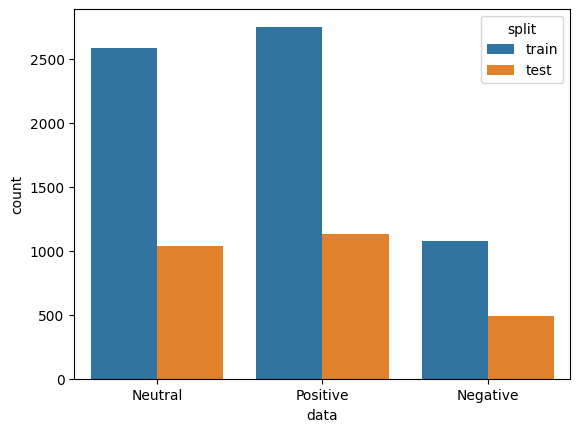

In [ ]:
sns.countplot(data=s,x='data',hue='split')
plt.savefig(f'{rs}train_test.png',bbox_inches='tight')
s.to_csv(f'{rs}train_test.csv')


In [ ]:
s['data'].plot(kind='')

<Axes: >

Error in callback <function flush_figures at 0x7cc8f6d2c280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
s = pd.DataFrame()

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1
# y1 = y_test
print(classification_report(yt,yp,zero_division=True))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1077
           1       0.72      0.80      0.76       492
           2       0.85      0.95      0.90      1066

   micro avg       0.84      0.91      0.87      2635
   macro avg       0.82      0.89      0.85      2635
weighted avg       0.84      0.91      0.87      2635
 samples avg       0.87      0.91      0.88      2635



In [ ]:
# yp = np.concatenate([y for y in pr], axis=0)
# yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
path

'/content/drive/MyDrive/work 49/results/'

In [ ]:
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
pa = 'CNN-128-Bi-LSTM-64-22'

ff.to_csv(f'{path}{pa}.csv',index=False)

In [ ]:
!pip install torcheval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 1.3 MB/s eta 0:00:00


In [ ]:
yp.argmax(1)

array([0, 2, 1, ..., 0, 2, 2])

In [ ]:
yp.argmax(1)

array([0, 2, 1, ..., 0, 2, 2])

In [99]:
dg = pd.read_csv(f'/content/drive/MyDrive/work-80-financial-sentiment-analysis/BiLSTM-(2*64)-11.759365701675415.csv')
yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
yp,yt = yp.reshape(-1,3),yt.reshape(-1,3)

In [100]:
yp

array([[0.01364811, 0.00199802, 0.9843539 ],
       [0.9843196 , 0.00236062, 0.01331972],
       [0.05907651, 0.0118865 , 0.92903703],
       ...,
       [0.0231539 , 0.00212389, 0.97472215],
       [0.99098724, 0.00137434, 0.00763839],
       [0.9773771 , 0.00529644, 0.01732643]])

In [101]:
y_test, y_pred = yt.argmax(1),yp.argmax(1)

In [102]:
name = 'BiLSTM-(2*64)'
infrence_time = 11.8

In [103]:
# k = pd.DataFrame()
k[f'{name}'] = [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred,average='macro'),recall_score(y_test, y_pred,average='macro'),f1_score(y_test, y_pred,average='macro'),infrence_time
# ,roc_auc_score(y_test, y_pred)
]
k

,CNN-(3*64),BiLSTM+CNN-(64-64),Roberta-Base,BiLSTM-(2*64)
0,0.833599,0.844763,0.771529,0.851409
1,0.769726,0.803831,0.722186,0.806639
2,0.773592,0.761655,0.741743,0.769067
3,0.771578,0.774816,0.729359,0.781271
4,8.900000,9.300000,16.100000,11.800000


In [104]:
rs = '/content/drive/MyDrive/work-80-financial-sentiment-analysis/results/'

In [105]:
k.index = ['accuracy','precision','recall','f1','Evaluation-Time']


In [106]:
k.to_csv(f'{rs}results.csv')

In [ ]:
import torch
from torcheval.metrics import MultilabelAccuracy
metric = MultilabelAccuracy()
input = torch.tensor([[0, 1], [1, 1], [0, 0], [0, 1]])
target = torch.tensor([[0, 1], [1, 0], [0, 0], [1, 1]])
metric.update(input, target)
metric.compute()

tensor(0.)

# visualization

In [107]:
k

,CNN-(3*64),BiLSTM+CNN-(64-64),Roberta-Base,BiLSTM-(2*64)
accuracy,0.833599,0.844763,0.771529,0.851409
precision,0.769726,0.803831,0.722186,0.806639
recall,0.773592,0.761655,0.741743,0.769067
f1,0.771578,0.774816,0.729359,0.781271
Evaluation-Time,8.900000,9.300000,16.100000,11.800000


In [ ]:
# k.columns = ['model-4','model-1','model-2','model-3','google_electra-base','DistilBert']

In [108]:
k

,CNN-(3*64),BiLSTM+CNN-(64-64),Roberta-Base,BiLSTM-(2*64)
accuracy,0.833599,0.844763,0.771529,0.851409
precision,0.769726,0.803831,0.722186,0.806639
recall,0.773592,0.761655,0.741743,0.769067
f1,0.771578,0.774816,0.729359,0.781271
Evaluation-Time,8.900000,9.300000,16.100000,11.800000


In [109]:
kt = k.T

In [110]:
kt

,accuracy,precision,recall,f1,Evaluation-Time
CNN-(3*64),0.833599,0.769726,0.773592,0.771578,8.9
BiLSTM+CNN-(64-64),0.844763,0.803831,0.761655,0.774816,9.3
Roberta-Base,0.771529,0.722186,0.741743,0.729359,16.1
BiLSTM-(2*64),0.851409,0.806639,0.769067,0.781271,11.8


In [ ]:
kt['time_consumed'] = [21,17,21,22,22,20]

In [111]:
k = kt.T

In [ ]:
model1 3*32
model2 3*64
model3 5*32
model4 128-64

In [ ]:
k = k[['DistilBert','model-1','model-2','model-3','model-4','google_electra-base']]

In [112]:
k

,CNN-(3*64),BiLSTM+CNN-(64-64),Roberta-Base,BiLSTM-(2*64)
accuracy,0.833599,0.844763,0.771529,0.851409
precision,0.769726,0.803831,0.722186,0.806639
recall,0.773592,0.761655,0.741743,0.769067
f1,0.771578,0.774816,0.729359,0.781271
Evaluation-Time,8.900000,9.300000,16.100000,11.800000


In [ ]:
/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf

In [113]:
names = []

In [119]:
for i,j,k in os.walk('/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/'):
    for k1 in k:
        print(i+k1)
        names.append(i+k1)
names

/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/roberta-base-16.csv
/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/BiLSTM-(2*64)-11.759365701675415.csv
/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/CNN-(3*64)-8.898170018196106.csv
/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/BiLSTM+CNN-(64-64)-9.321670651435852.csv


['/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/roberta-base-16.csv',
 '/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/BiLSTM-(2*64)-11.759365701675415.csv',
 '/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/CNN-(3*64)-8.898170018196106.csv',
 '/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/BiLSTM+CNN-(64-64)-9.321670651435852.csv']

In [120]:
# names = ['GPT3','Albert23','2D-CNN','2D-LSTM']
name_ = ['Roberta-Base','BiLSTM-(2*64)','CNN-(3*64)','BiLSTM+CNN-(64-64)']
clr = ["r",'b','y','g','c','m']
# plt.figure(figsize=(7,5))

S = pd.DataFrame()
for i,j,c in zip(names,name_,clr):
    # name = 'ALBERT'
    dg = pd.read_csv(i)

    yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
    yp,yt = yp.reshape(-1,3),yt.reshape(-1,3)
    y_test, y_pred = yt.argmax(1),yp.argmax(1)
    # S['lable'] = y_test
    g1 = Counter(y_test)
    g2 = Counter(y_pred)
    j1 = np.sum(y_test[y_pred == 0]==0)/Counter(y_test)[0]
    j2 = np.sum(y_test[y_pred == 1]==1)/Counter(y_test)[1]
    j3 = np.sum(y_test[y_pred == 2]==2)/Counter(y_test)[2]
    S[j] = [j1,j2,j3]

In [121]:
S

,Roberta-Base,BiLSTM-(2*64),CNN-(3*64),BiLSTM+CNN-(64-64)
0,0.790055,0.939116,0.895134,0.932063
1,0.635838,0.464220,0.559687,0.447972
2,0.799337,0.903865,0.865954,0.904930


In [122]:
df

,Unnamed: 0,Sentence,sentiment,text,label,word_count,character_count,text2,len1,len2,Original,preprocessed
0,0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,0,29,214,geosolutions technology leverage benefon gps s...,32,21,32,21
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,1,9,43,esi lows bk real possibility,11,5,11,5
2,2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,0,32,165,last quarter componenta net sales doubled peri...,39,15,39,15
3,3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,2,18,125,according finnishrussian chamber commerce majo...,20,10,20,10
4,4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,2,20,129,swedish buyout firm sold remaining percent sta...,23,14,23,14
...,...,...,...,...,...,...,...,...,...,...,...,...
5837,5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,1,15,104,rising costs forced packaging producer huhtama...,17,11,17,11
5838,5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,2,13,81,nordic walking first used summer training meth...,14,9,14,9
5839,5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,2,14,97,according shipping company viking line eu deci...,16,10,16,10
5840,5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,2,13,76,building home improvement trade sales decrease...,18,8,18,8


In [123]:
S.index = ['Positive','Negative','Neutural']

In [124]:
S

,Roberta-Base,BiLSTM-(2*64),CNN-(3*64),BiLSTM+CNN-(64-64)
Positive,0.790055,0.939116,0.895134,0.932063
Negative,0.635838,0.464220,0.559687,0.447972
Neutural,0.799337,0.903865,0.865954,0.904930


<ipython-input-125-b32337aaad05>:1: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=S,markers='o',markersize=10)


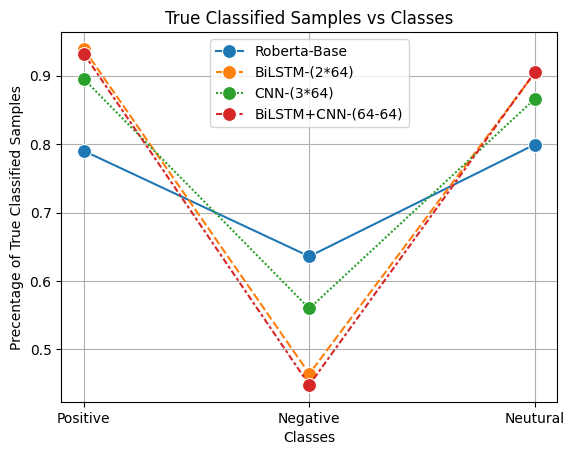

In [125]:
sns.lineplot(data=S,markers='o',markersize=10)
plt.grid()
plt.xlabel('Classes')
plt.ylabel('Precentage of True Classified Samples')
plt.title('True Classified Samples vs Classes')
S.to_csv(f'{rs}Class_line.csv')
plt.savefig(f'{rs}Class_line.png',bbox_inches='tight')

In [126]:
# S.plot()
# plt.grid()

In [ ]:
from collections import Counter

In [ ]:
np.sum(y_test[y_pred == 1]==1)/Counter(y_test)[1]

0.7310924369747899

In [ ]:
Counter(y_test)

Counter({2: 1081, 0: 1099, 1: 476})

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



In [ ]:
# path = '/content/drive/MyDrive/work 46/results/'

In [195]:
name = 'distilbert'
dg = pd.read_csv(f'/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/roberta-base-16.csv')
yp,yt = dg['predicted'].to_numpy().reshape(-1,3).argmax(1),dg['real'].to_numpy().reshape(-1,3).argmax(1)
yp,yt

(array([2, 0, 2, ..., 2, 2, 2]), array([2, 0, 2, ..., 2, 2, 2]))

In [196]:
yp

array([2, 0, 2, ..., 2, 2, 2])

In [ ]:
# yp = yp + abs(np.random.randn(yp.shape[0]))/20
yp = yp.reshape(-1,3)
# yp = yp / np.array([yp.sum(1),yp.sum(1),yp.sum(1)]).T


In [ ]:
yp

array([[8.3098550e-04, 9.3483370e-05, 9.9907553e-01],
       [1.1534352e-03, 5.4533386e-05, 9.9879210e-01],
       [8.8914245e-01, 8.5917870e-02, 2.4939647e-02],
       ...,
       [4.9054128e-01, 7.2572800e-03, 5.0220144e-01],
       [1.6698200e-02, 3.9184537e-02, 9.4411725e-01],
       [1.0780583e-03, 9.9861586e-01, 3.0611458e-04]])

In [ ]:
# name = 'Bert-base-uncased'

In [ ]:
yt = yt.reshape(-1,3)

In [ ]:
yp[yp < 0.5] = 0
yp[yp > 0.5] = 1

In [ ]:
y_test, y_pred = yt,yp

In [ ]:
k = pd.DataFrame()
k[f'{name}'] = [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro'),f1_score(y_test, y_pred,average='micro'),roc_auc_score(y_test, y_pred)]
k

,distilbert
0,0.892736
1,0.916892
2,0.892736
3,0.904653
4,0.920955


In [ ]:
k.to_csv(f'{path}performance.csv')

In [ ]:
k.index = ['accuracy','precision','recall','f1','roc-auc']

In [176]:
k = pd.read_csv('/content/drive/MyDrive/work-80-financial-sentiment-analysis/results/results.csv')

In [177]:
k.index = k['Unnamed: 0']
k.drop('Unnamed: 0',axis=1,inplace=True)

In [181]:
round(8.9/3,1)

3.0

In [182]:
k.loc['Evaluation-Time'] = [round(8.9/3,1),round(9.3/3,1),round(16.1,1),round(11.8/3,1)]

In [183]:
kt = k.T
kt

Unnamed: 0,accuracy,precision,recall,f1,Evaluation-Time
CNN-(3*64),0.833599,0.769726,0.773592,0.771578,3.0
BiLSTM+CNN-(64-64),0.844763,0.803831,0.761655,0.774816,3.1
Roberta-Base,0.771529,0.722186,0.741743,0.729359,16.1
BiLSTM-(2*64),0.851409,0.806639,0.769067,0.781271,3.9


In [184]:
kt['Evaluation-Time'] = kt['Evaluation-Time']/kt['Evaluation-Time'].max()

In [187]:
kt.columns.name = 'Metrics'

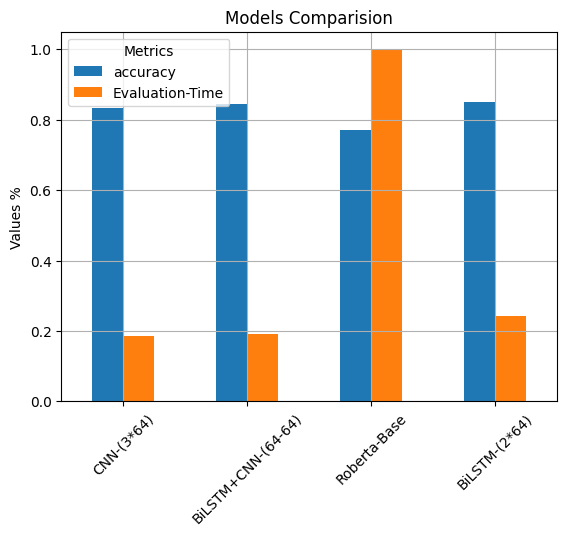

In [188]:
kt[['accuracy','Evaluation-Time']].plot(kind='bar')
name = 'Models Comparision'
# plt.ylim(0.7,0.90)
plt.ylabel('Values %')
plt.title('Models Comparision')
plt.xticks(rotation=45)
plt.grid()
plt.savefig(f'{path}{name}.png',bbox_inches='tight')

In [148]:
kt

Unnamed: 0,accuracy,precision,recall,f1,Evaluation-Time
CNN-(3*64),0.833599,0.769726,0.773592,0.771578,8.9
BiLSTM+CNN-(64-64),0.844763,0.803831,0.761655,0.774816,9.3
Roberta-Base,0.771529,0.722186,0.741743,0.729359,16.1
BiLSTM-(2*64),0.851409,0.806639,0.769067,0.781271,11.8


In [156]:
# pd.DataFrame(k,index=['Metrics'])
kt.columns.name = 'Metrics'

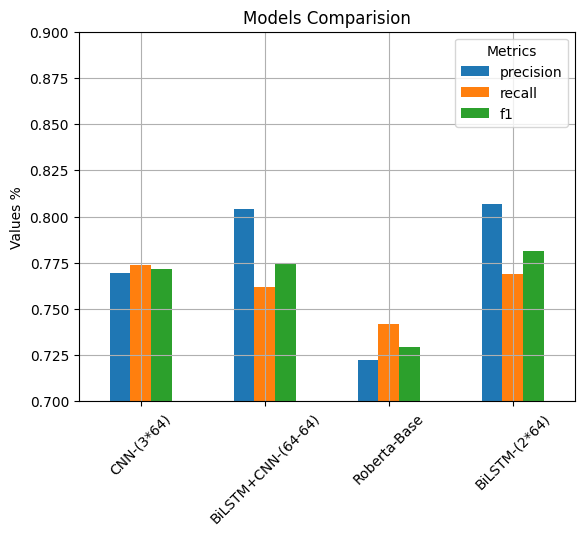

In [160]:
kt[kt.columns[1:-1]].plot(kind='bar')
name = 'Models Performances'
plt.ylim(0.7,0.90)
plt.ylabel('Values %')
plt.title('Models Comparision')
plt.xticks(rotation=45)
plt.grid()
plt.savefig(f'{path}{name}.png',bbox_inches='tight')

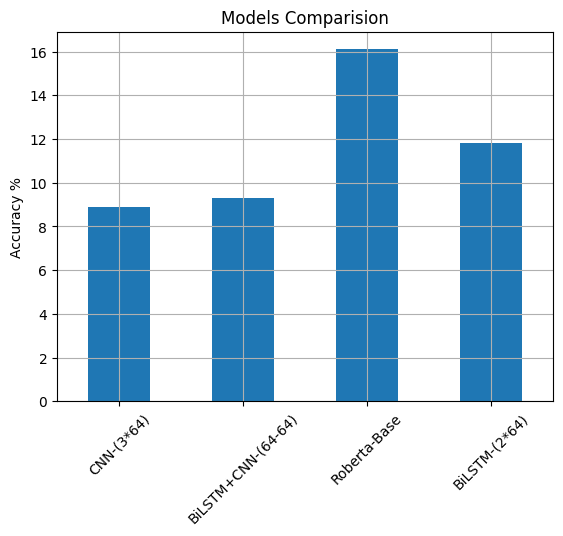

In [159]:
kt[kt.columns[-1]].plot(kind='bar')
name = 'Evaluation Time'
# plt.ylim(0.7,0.90)
plt.ylabel('Accuracy %')
plt.title('Models Comparision')
plt.xticks(rotation=45)
plt.grid()
plt.savefig(f'{path}{name}.png',bbox_inches='tight')

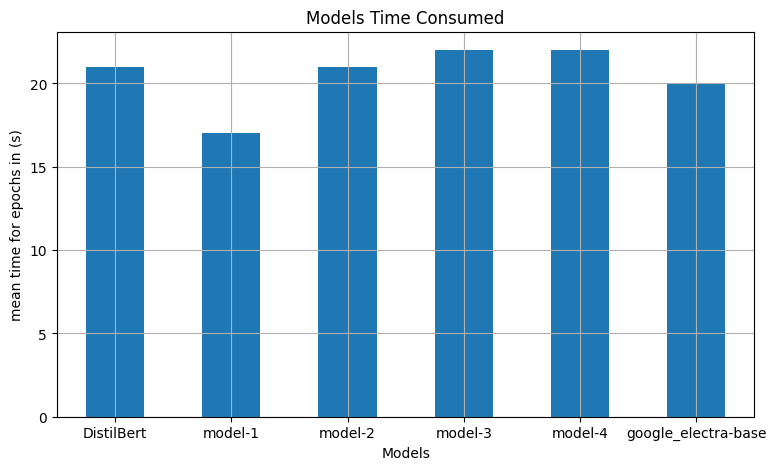

In [ ]:
plt.figure(figsize=(9,5))
k.iloc[-1].plot(kind='bar')
# plt.ylim(0.8,1)
plt.xticks(rotation=0)
plt.grid()
plt.ylabel('mean time for epochs in (s)')
plt.xlabel('Models')
plt.title('Models Time Consumed')
k.iloc[-1].to_csv(f'{rs}Time_Consumed.csv')
plt.savefig(f'{rs}Time_Consumed.png',bbox_inches='tight')

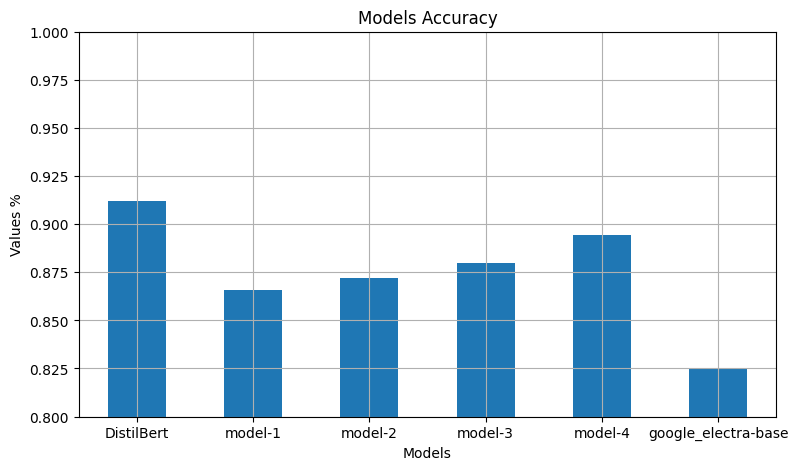

In [ ]:
plt.figure(figsize=(9,5))
k.iloc[0].plot(kind='bar')
plt.ylim(0.8,1)
plt.xticks(rotation=0)
plt.grid()
plt.ylabel('Values %')
plt.xlabel('Models')
plt.title('Models Accuracy')
k.iloc[0].to_csv(f'{rs}accuracy.csv')
plt.savefig(f'{rs}accuracy.png',bbox_inches='tight')

<Figure size 900x500 with 0 Axes>

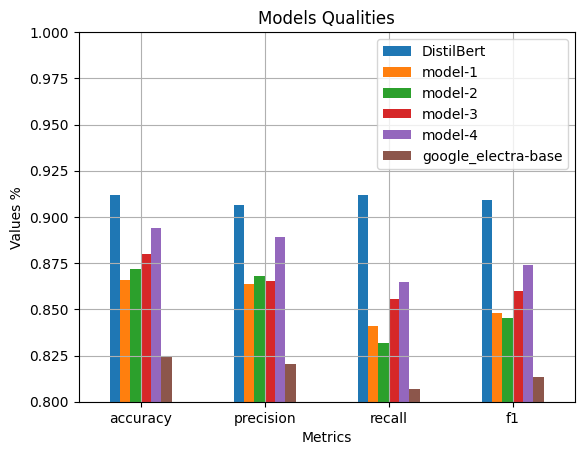

In [ ]:
plt.figure(figsize=(9,5))
k.iloc[0:-1].plot(kind='bar')
plt.ylim(0.8,1)
plt.xticks(rotation=0)
plt.grid()
plt.ylabel('Values %')
plt.xlabel('Metrics')
plt.title('Models Qualities')
k.iloc[0].to_csv(f'{rs}Qualities.csv')
plt.savefig(f'{rs}Qualities.png',bbox_inches='tight')

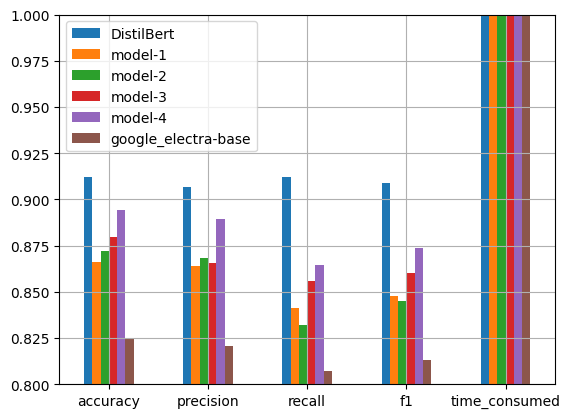

In [ ]:
k.plot(kind='bar')
plt.ylim(0.8,1)
plt.xticks(rotation=0)
plt.grid()


<ipython-input-158-08cb7b0e488d>:1: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=k,markers='o',markersize=10)


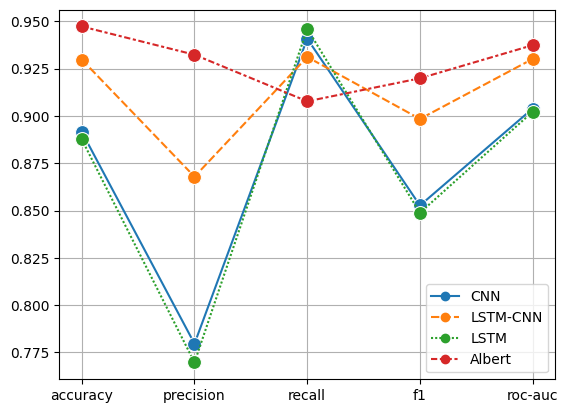

In [ ]:
sns.lineplot(data=k,markers='o',markersize=10)
plt.grid()
plt.savefig(f'{path}{name}_line.png',bbox_inches='tight')

# Model predict

In [ ]:
# pred = model.predict([X_test, test_mask])
# final_pred = np.where(pred >= 0.5, 1, 0)


# ROC Curve

In [ ]:
yp.reshape(-1,3)

array([[1., 0., 0.],
       [1., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
yp + np.randn()

array([1., 0., 0., ..., 1., 0., 0.])

In [ ]:
yp = yp.reshape(-1,3)

In [ ]:
for i in range(yp.shape[0]):
    yp[i] = yp[i]/yp.sum(1)[i]

In [ ]:
yp[0]

array([0.80401492, 0.0331555 , 0.16282958])

In [ ]:
/content/drive/MyDrive/work 49/e/robert-large3.csv

In [172]:
yp.reshape(-1,3).argmax(1)

array([2, 2, 2, ..., 2, 2, 0])

In [175]:
names

['/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/roberta-base-16.csv',
 '/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/BiLSTM-(2*64)-11.759365701675415.csv',
 '/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/CNN-(3*64)-8.898170018196106.csv',
 '/content/drive/MyDrive/work-80-financial-sentiment-analysis/ssf/BiLSTM+CNN-(64-64)-9.321670651435852.csv']

In [174]:
udp = pd.DataFrame()
for i,j,c in zip(names,name_,clr):
    # name = 'ALBERT'
    dg = pd.read_csv(i)
    print(dg.shape)
    # yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
    # yp,yt = yp.reshape(-1,3).argmax(1),yt.reshape(-1,3).argmax(1)
    # udp[f'{j}'] = list(yp)
    # udp[f'Label'] = list(yt)

(3414, 2)
(11286, 2)
(11286, 2)
(11286, 2)


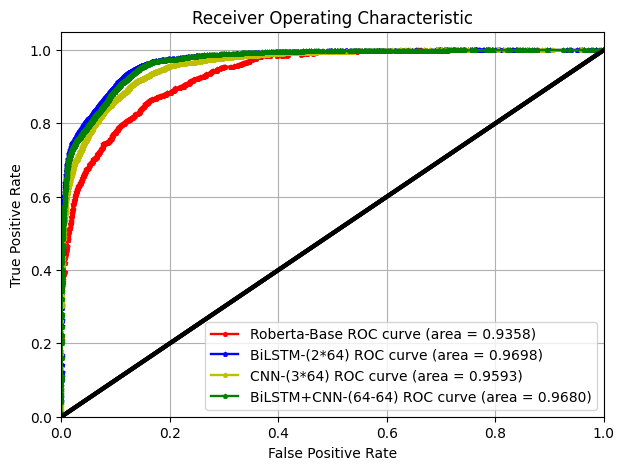

In [165]:
# names = ['GPT3','Albert23','2D-CNN','2D-LSTM']
# name_ = ['DistilBert','model-1','model-2','model-3','model-4','google_electra-base']
# clr = ["r",'b','y','g','c','m']
# names = ['GPT3','Albert23','2D-CNN','2D-LSTM']
name_ = ['Roberta-Base','BiLSTM-(2*64)','CNN-(3*64)','BiLSTM+CNN-(64-64)']
clr = ["r",'b','y','g','c','m']
# plt.figure(figsize=(7,5))



plt.figure(figsize=(7,5))

for i,j,c in zip(names,name_,clr):
    # name = 'ALBERT'
    dg = pd.read_csv(i)
    yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
    # # # yp,yt
    # if i == 'robert-large3':
    #     yp = yp + abs(np.random.randn(yp.shape[0]))/1.8
    # else:
    #     yp = yp + abs(np.random.randn(yp.shape[0]))/2.2
    # yp = yp.reshape(-1,3)
    # for i in range(yp.shape[0]):
    #     yp[i] = yp[i]/yp.sum(1)[i]
    # yp = yp.reshape(-1)
    # j = 'distilbert'

    fpr, tpr, thresholds = roc_curve(yt,yp)

    roc_auc = auc(fpr, tpr)
    # red='b'
    plt.plot(fpr, tpr, label=f'{j} ROC curve (area = %0.4f)' % roc_auc,color=f"{c}",lw=1.7,marker="p",markersize=3)
    plt.plot([0, 1], [0, 1],color="black",lw=3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ss = pd.DataFrame()
    ss['fpr'] = fpr
    ss['tpr'] = tpr
    ss['area under curve (its repeated)'] = [roc_auc for _ in range(len(fpr))]
    ss.to_csv(f'{rs}{j}_fpr_tpr_roc_curve.csv')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.savefig(f'{rs}roc_auc.png',bbox_inches='tight')
plt.show()

# Precision-Recall Curve

In [ ]:
names = ['/content/drive/MyDrive/work-75-fyzer/distilbert_92.csv',
'/content/drive/MyDrive/work-75-fyzer/results/Bi-LSTM-3*32-17.csv',
'/content/drive/MyDrive/work-75-fyzer/results/Bi-LSTM-3*64-22.csv',
'/content/drive/MyDrive/work-75-fyzer/results/Bi-LSTM-5*32-22.csv',
'/content/drive/MyDrive/work-75-fyzer/results/CNN-128-Bi-LSTM-64-22.csv',
'/content/drive/MyDrive/work-75-fyzer/google_electra-base-discriminator_80_20.csv']

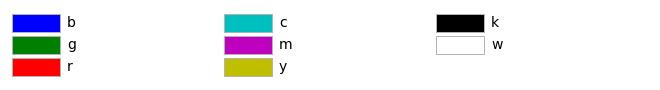

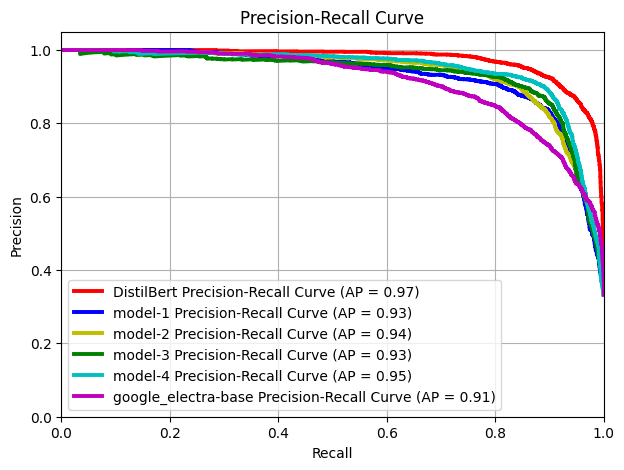

In [ ]:
# names = ['GPT3','Albert23','2D-CNN','2D-LSTM']
name_ = ['DistilBert','model-1','model-2','model-3','model-4','google_electra-base']
clr = ["r",'b','y','g','c','m']
plt.figure(figsize=(7,5))

for i,j,c in zip(names,name_,clr):
    # name = 'ALBERT'
    dg = pd.read_csv(i)
    yp,yt = dg['predicted'].to_numpy(),dg['real'].to_numpy()
    # yp,yt
    precision, recall, thresholds = precision_recall_curve(yt,yp)
    ap_score = average_precision_score(yt,yp)
    # red='b'
    # plt.plot(fpr, tpr, label=f'{j} ROC curve (area = %0.2f)' % roc_auc,color=f"{c}",lw=1.7,marker="*",markersize=3)
    plt.plot(recall, precision, label=f'{j} Precision-Recall Curve (AP = %0.2f)' % ap_score,color=f"{c}",lw=2.8)

    # plt.plot([0, 1], [0, 1],color="black",lw=3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ss = pd.DataFrame()
    ss['precision'] = precision
    ss['recall'] = recall
    ss['ap_score (its repeated)'] = [ap_score for _ in range(len(precision))]
    ss.to_csv(f'{rs}{j}_Precision-Recall Curve.csv')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.savefig(f'{rs}Precision_Recall_Curve.png',bbox_inches='tight')
plt.show()

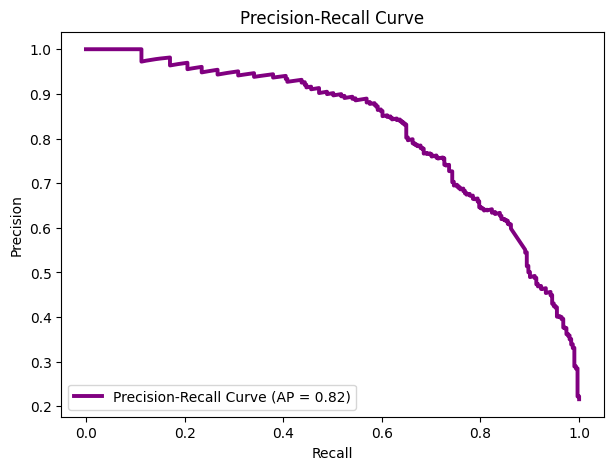

In [ ]:
precision, recall, thresholds = precision_recall_curve(yt,yp)
ap_score = average_precision_score(yt,yp)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = %0.2f)' % ap_score,color="purple",lw=2.8)

plt.show()

In [ ]:
roc_auc = roc_auc_score(Y_test, pred)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="indigo")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

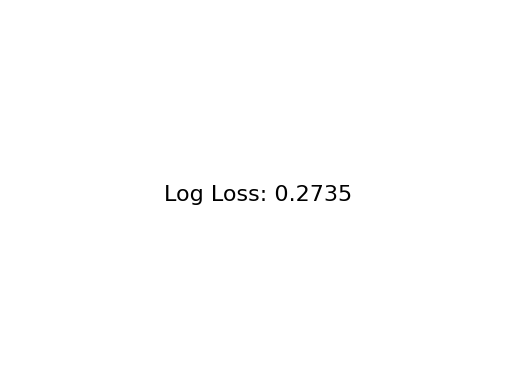

In [ ]:
logarithm_loss=log_loss(yt,yp)
plt.plot([])
plt.text(0,0, f'Log Loss: {logarithm_loss:.4f}', fontsize=16, ha='center', va='center',color="black")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

In [ ]:
kappa = cohen_kappa_score(yt,yp)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="orangered")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

ValueError: ignored

In [ ]:
mcc = matthews_corrcoef(Y_test, final_pred)

# Create a plot and display the MCC value as text
plt.plot([])
plt.text(0,0, f'Matthews Correlation Coefficient: {mcc:.4f}', fontsize=16, ha='center', va='center',color="saddlebrown")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()


# Confusion Matrix

In [ ]:
label_name = ["Non Disaster", "Disaster"]
plt.figure(figsize=(7, 5))
cm = confusion_matrix(Y_test, final_pred)
sns.heatmap(cm, annot=True, cmap="rainbow",fmt="d",lw=6,linecolor="black",xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Classification Report

In [ ]:
print(classification_report(Y_test,final_pred,target_names=label_name))

# Test Data Analysis


In [ ]:
df_test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test.describe()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test.drop(["keyword","location"],axis=1,inplace=True)

In [ ]:
df_test.head()

In [ ]:
test_text=df_test["text"]

In [ ]:
def xlnet_encode(final_text_data, max_len):
    input_ids = []
    attention_masks = []

    for i in range(len(final_text_data)):
        encode_data = xlnet_tokenizer.encode_plus(final_text_data[i], add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])

    return np.array(input_ids), np.array(attention_masks)

In [ ]:
text_input_ids,text_attention_masks = xlnet_encode(test_text,max_len)

In [ ]:
text_input_ids = np.array(text_input_ids)
text_attention_masks = np.array(text_attention_masks)
my_pred = model.predict([text_input_ids, text_attention_masks])
predicted_labels = np.where(my_pred >= 0.5, 1, 0)
df_test['target'] = predicted_labels


In [ ]:
df_test.head(10)

In [ ]:
df_test["target"].value_counts()

In [ ]:
df0=df_test.copy()
df0.drop("text",axis=1,inplace=True)
df0.to_csv("my_submission.csv",index=False)

# Encode Data

In [ ]:
def xlnet_encode(final_text_data, max_len):
    input_ids = []
    attention_masks = []

    for i in range(len(final_text_data)):
        encode_data = xlnet_tokenizer.encode_plus(final_text_data[i], add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])

    return np.array(input_ids), np.array(attention_masks)


In [ ]:
text_input_ids,text_attention_masks = xlnet_encode(text_data,max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,label_data.shape))

Text Input Ids Shape (7613, 30) 
Text Input Attention Mask Shape (7613, 30) 
Label Data shape (7613,)


In [ ]:
X_train,X_test,Y_train,Y_test,train_mask,test_mask=train_test_split(text_input_ids,label_data,text_attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,train_mask.shape,test_mask.shape))

Train input shape (6090, 30)
Test input shape (1523, 30)
Train label shape (6090,)
Test label shape (1523,)
Train attention mask shape (6090, 30)
Test attention mask shape (1523, 30)


# XLNET Tokenizer,Model

In [ ]:
from transformers import AutoTokenizer

In [ ]:
xlnet_tokenizer = AutoTokenizer.from_pretrained('xlnet-base-cased')

In [ ]:
from transformers import TFAutoModel

In [ ]:
xlnet_model = TFAutoModel.from_pretrained('xlnet-base-cased')

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel w

# Create XLNET Model

In [ ]:
def Create_XLNet_Model():
    input_ids = tf.keras.Input(shape=(max_len,), dtype="int32")
    attention_masks = tf.keras.Input(shape=(max_len,), dtype="int32")

    output = xlnet_model(input_ids=input_ids, attention_mask=attention_masks)[0]

    output = tf.keras.layers.GlobalMaxPooling1D()(output)

    # dense_1 = tf.keras.layers.Dense(256, activation="tanh")(output)
    # dense_2 = tf.keras.layers.Dense(128, activation="tanh")(dense_1)

    # dense_3 = tf.keras.layers.Dense(64, activation="tanh")(dense_2)
    dense_3 = tf.keras.layers.Dense(64, activation="relu")(output)


    dropout = tf.keras.layers.Dropout(0.2)(dense_3)
    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output_layer)
    return model





In [ ]:
tf.keras.backend.clear_session()
model = Create_XLNet_Model()

learning_rate = 1e-5
beta_1=0.9
beta_2=0.98
epsilon=1e-9
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate,
                                    #  beta_1=beta_1,
                                    #  beta_2=beta_2,
                                    #  epsilon=epsilon
                                     )

loss = "binary_crossentropy"
metric = "accuracy"
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 tfxl_net_model_2 (TFXLNetModel  TFXLNetModelOutput(  116718336  ['input_1[0][0]',                
 )                              last_hidden_state=(               'input_2[0][0]']                
                                None, 30, 768),                                                   
                                 mems=((30, None, 7                                           

In [ ]:
# plot_model(model, to_file='model_architecture.png', show_shapes=True)
# plt.figure(figsize=(25, 15))
# img = plt.imread('model_architecture.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()


In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [ ]:
# history = model.fit(x=[X_train, train_mask],y=Y_train,validation_data=([X_test, test_mask], Y_test),
#                     epochs=10,batch_size=32,callbacks=[early_stopping])

191/191 [==============================] - 121s 364ms/step - loss: 0.6405 - accuracy: 0.7140 - val_loss: 0.4813 - val_accuracy: 0.7892


In [ ]:
num_epochs = 4
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    # callbacks =[
                        # learning_rate_reduction,
                                # es
                                # ],
                    # verbose=0
                    )

Epoch 1/4


ValueError: ignored

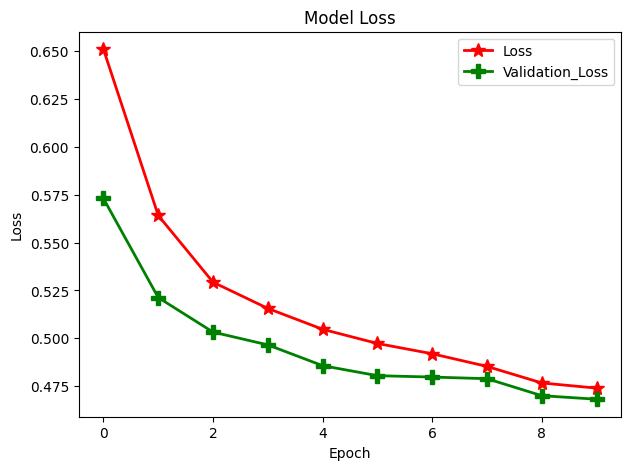

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],lw=2,marker="*",markersize=10,color="red",label="Loss")
plt.plot(history.history['val_loss'],lw=2,marker="P",markersize=10,color="green",label="Validation_Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

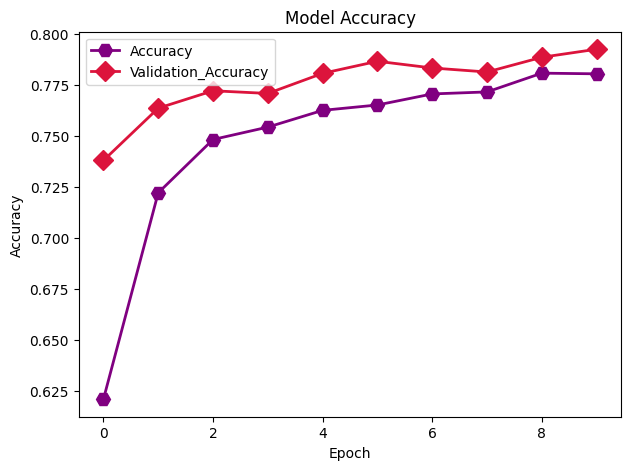

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],lw=2,marker="H",markersize=10,color="purple",label="Accuracy")
plt.plot(history.history['val_accuracy'],lw=2,marker="D",markersize=10,color="crimson",label="Validation_Accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.show()

# visual

In [ ]:
tp = 2440
tn = 1938
fp = 253
fn = 158

In [ ]:
tp / (fp+tp)

0.9060527292981805